## Initialization

In [1]:

import h5py
import numpy as np
import matplotlib.pyplot as plt


## Read the results

In [2]:

fdir = '/home/beams/8IDIUSER/Documents/llps-saxpcs/reanalysis_2025_0806/cluster_results/'

fn_1 = 'E0172_H06-c6c5-4_a0011_f100000_r00001_results.hdf'
fn_2 = 'E0171_H06-c6c5-4_a0014_f100000_r00001_results.hdf'
fn_3 = 'E0173_H06-c6c5-4_a0009_f100000_r00001_results.hdf'
fn_4 = 'E0174_H06-c6c5-4_a0007_f100000_r00001_results.hdf'

with h5py.File(fdir+fn_1, "r") as hf:
    g2_1 = hf["xpcs"]["multitau"]["normalized_g2"][:]
    g2_err_1 = hf["xpcs"]["multitau"]["normalized_g2_err"][:]
    saxs_1d_1 = np.squeeze(hf["xpcs"]["temporal_mean"]["scattering_1d"][:])
    
    t_el = hf["xpcs"]["multitau"]["delay_list"][:]
    t0 = hf["entry"]["instrument"]["detector_1"]["frame_time"][()]
    ql_dyn = hf["xpcs"]["qmap"]["dynamic_v_list_dim0"][:]
    ql_sta = hf["xpcs"]["qmap"]["static_v_list_dim0"][:]

with h5py.File(fdir+fn_2, "r") as hf:
    g2_2 = hf["xpcs"]["multitau"]["normalized_g2"][:]
    g2_err_2 = hf["xpcs"]["multitau"]["normalized_g2_err"][:]
    saxs_1d_2 = np.squeeze(hf["xpcs"]["temporal_mean"]["scattering_1d"][:])

with h5py.File(fdir+fn_3, "r") as hf:
    g2_3 = hf["xpcs"]["multitau"]["normalized_g2"][:]
    g2_err_3 = hf["xpcs"]["multitau"]["normalized_g2_err"][:]
    saxs_1d_3 = np.squeeze(hf["xpcs"]["temporal_mean"]["scattering_1d"][:])

with h5py.File(fdir+fn_4, "r") as hf:
    g2_4 = hf["xpcs"]["multitau"]["normalized_g2"][:]
    g2_err_4 = hf["xpcs"]["multitau"]["normalized_g2_err"][:]
    saxs_1d_4 = np.squeeze(hf["xpcs"]["temporal_mean"]["scattering_1d"][:])



## Define formatting for the plots

In [3]:

def plot_style(ax, x, y, label, color=None):
    ax.plot(x, y,
            marker='o',
            mfc='None',
            mec=color,
            mew=0.5,
            ms=2,
            color=color,
            label=label,
            linestyle='',
            linewidth=1.0) 

def plot_error_style(ax, x, y, y_err, label, color=None):
    ax.errorbar(x, y, y_err,
            marker='o',
            mfc='None',
            mec=color,
            mew=0.5,
            ms=5,
            color=color,
            label=label,
            linestyle='',
            linewidth=1.0)


## Generation the figures

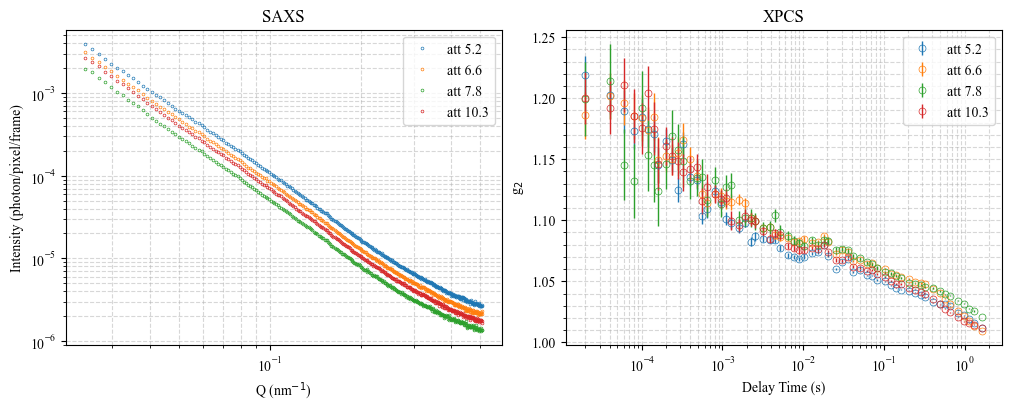

In [5]:


x_saxs = ql_sta*10
x_g2 = t_el*t0

fig, axs = plt.subplots(1, 2, figsize=(10, 4), constrained_layout=True)

plt.rcParams["font.size"] = 10 
plt.rcParams["font.family"] = "Times New Roman"

# Left panel
plot_style(axs[0], x_saxs, saxs_1d_1, "att 5.2", color='C0')
plot_style(axs[0], x_saxs, saxs_1d_2, "att 6.6", color='C1')
plot_style(axs[0], x_saxs, saxs_1d_3, "att 7.8", color='C2')
plot_style(axs[0], x_saxs, saxs_1d_4, "att 10.3", color='C3')
axs[0].set_xlabel("Q (nm$^{-1}$)")
axs[0].set_ylabel("Intensity (photon/pixel/frame)")
axs[0].set_title("SAXS")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].minorticks_on()
axs[0].grid(True, which='both', ls='--', alpha=0.5)
axs[0].legend()

# Right panel
plot_error_style(axs[1], x_g2, g2_1[:,0], g2_err_1[:,0], "att 5.2", 'C0')
plot_error_style(axs[1], x_g2, g2_2[:,0], g2_err_2[:,0], "att 6.6", 'C1')
plot_error_style(axs[1], x_g2, g2_3[:,0], g2_err_3[:,0], "att 7.8", 'C2')
plot_error_style(axs[1], x_g2, g2_4[:,0], g2_err_4[:,0], "att 10.3", 'C3')
axs[1].set_xlabel("Delay Time (s)")
axs[1].set_ylabel("g$_2$")
axs[1].set_title("XPCS")
axs[1].set_xscale('log')
axs[1].minorticks_on()
axs[1].grid(True, which='both', ls='--', alpha=0.5)
axs[1].legend()

plt.show()
